In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
df = pd.read_csv('fake_reg.csv')

In [28]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


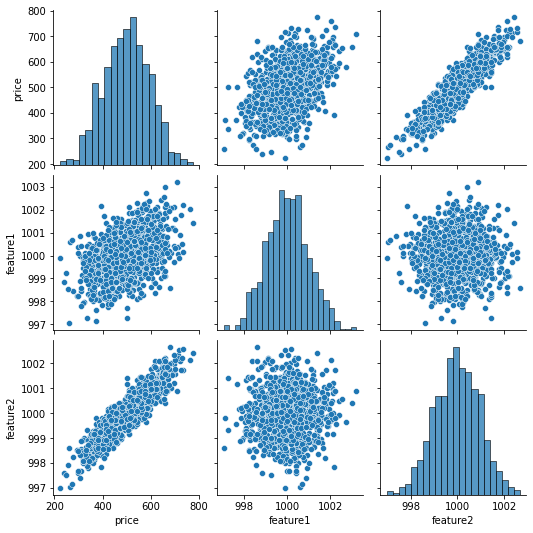

In [29]:
sns.pairplot(df)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df[['feature1','feature2']].values # tensorflow numpy arrayben kezeli
y = df['price'].values # price is a one dimensional vector

In [32]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
# normalize and scale the training data
# transforms the data based on the StD and the minmax values
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler() # instance of the scaler

In [36]:
scaler.fit(X_train) # calculates StD, min, max

MinMaxScaler()

In [37]:
X_train = scaler.transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_train # standardized X_train matrix

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
# dense = every neuron is connected with every neuron

model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')
# optimizer/loss function should be chosen according to the class./reg. problem

In [42]:
model.fit(x=X_train,y=y_train,epochs=250,verbose=5) # epochs should be chosen correctly as well (overfit)

Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 35/250
Epoch 36/250
Epoch 37/250
Epoch 38/250
Epoch 39/250
Epoch 40/250
Epoch 41/250
Epoch 42/250
Epoch 43/250
Epoch 44/250
Epoch 45/250
Epoch 46/250
Epoch 47/250
Epoch 48/250
Epoch 49/250
Epoch 50/250
Epoch 51/250
Epoch 52/250
Epoch 53/250
Epoch 54/250
Epoch 55/250
Epoch 56/250
Epoch 57/250
Epoch 58/250
Epoch 59/250
Epoch 60/250
Epoch 61/250
Epoch 62/250
Epoch 63/250
Epoch 64/250
Epoch 65/250
Epoch 66/250
Epoch 67/250
Epoch 68/250
Epoch 69/250
Epoch 70/250
Epoch 71/250
Epoch 72/250
Epoch 73/250
Epoch 74/250
Epoch 75/250
Epoch 76/250
Epoch 77/250
Epoch 78

In [43]:
loss_df = pd.DataFrame(model.history.history)

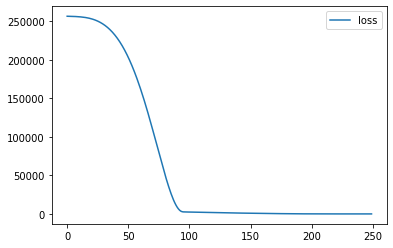

In [44]:
loss_df.plot()

Evaluation of the model

In [45]:
model.evaluate(X_test,y_test)
# metric loss == MSE in this case

10/10 [==============================] - 0s 2ms/step - loss: 24.9752


24.9752254486084

In [46]:
model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 1ms/step - loss: 23.8155


23.81549644470215

In [47]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [48]:
test_predictions

array([[405.29602],
       [623.5421 ],
       [592.121  ],
       [572.2611 ],
       [366.68387],
       [579.1916 ],
       [515.1157 ],
       [459.08942],
       [549.2795 ],
       [447.49704],
       [611.787  ],
       [548.88983],
       [419.11057],
       [408.89017],
       [651.18115],
       [437.28815],
       [508.40695],
       [659.98517],
       [662.6076 ],
       [565.51715],
       [334.26627],
       [444.84332],
       [382.55615],
       [378.75922],
       [566.6031 ],
       [610.62683],
       [532.4041 ],
       [427.86072],
       [655.4822 ],
       [414.0642 ],
       [442.61887],
       [485.1329 ],
       [438.41583],
       [681.8775 ],
       [424.72467],
       [417.71808],
       [501.8679 ],
       [550.47455],
       [509.7848 ],
       [395.4212 ],
       [618.58093],
       [416.6172 ],
       [604.4416 ],
       [445.9232 ],
       [501.9952 ],
       [581.65393],
       [668.9548 ],
       [490.38455],
       [318.55972],
       [485.43826],


In [49]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [50]:
test_predictions # pandas series instead of numpy array

0      405.296021
1      623.542114
2      592.120972
3      572.261108
4      366.683868
          ...    
295    529.076050
296    515.434387
297    609.647583
298    416.932770
299    410.905121
Length: 300, dtype: float32

In [51]:
pred_df = pd.DataFrame(y_test,columns=['Test true Y'])

In [52]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [54]:
pred_df.columns = ['Test True Y', 'Model predictions']

In [55]:
pred_df

,Test True Y,Model predictions
0,402.296319,405.296021
1,624.156198,623.542114
2,582.455066,592.120972
3,578.588606,572.261108
4,371.224104,366.683868
...,...,...
295,525.704657,529.076050
296,502.909473,515.434387
297,612.727910,609.647583
298,417.569725,416.932770


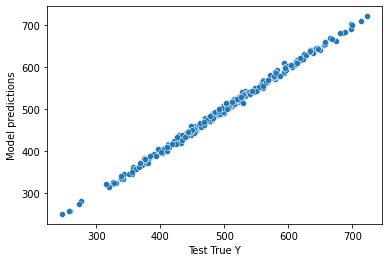

In [56]:
sns.scatterplot(data=pred_df,x='Test True Y',y='Model predictions')

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model predictions'])

4.003327252945558

In [61]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model predictions'])

24.975228200053742

In [63]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model predictions'])**0.5
# RMSE

4.9975222060590925

In [64]:
new_gem = [[998,1000]] # feature 1, feature 2 <= how should I price this?

In [65]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [66]:
new_gem = scaler.transform(new_gem)

In [67]:
model.predict(new_gem)

1/1 [==============================] - 0s 35ms/step


array([[419.7488]], dtype=float32)

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save('gem_model.h5')